<a href="https://colab.research.google.com/github/nedflowers/Neural-Networks/blob/main/BuildBasicNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

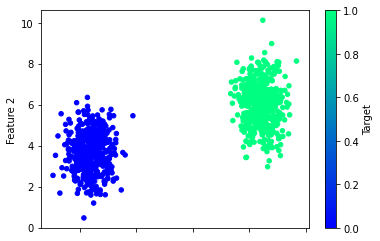

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create DF with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] =y

# Plotting dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Split Dataset

In [ ]:
# use sklerarn to split datset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Standarize Data

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


Create Sequential Model

In [ ]:
# Create Keras Sequential Model
nn_model = tf.keras.models.Sequential()

In [ ]:
# add first dense layer including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation ="relu", input_dim=2))

In [ ]:
# Add the output layer that uses probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check Sequential model structure
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the Sequential Model together and cust metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train and Test  

In [ ]:
# fit model to training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

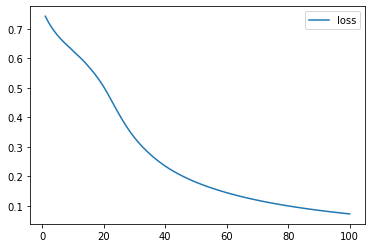

In [ ]:
# Create a DF containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


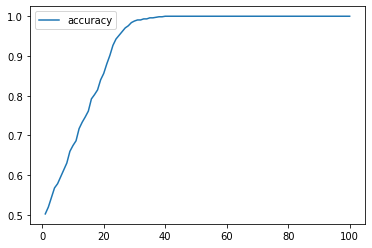

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using test data 
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0680 - accuracy: 1.0000 - 149ms/epoch - 19ms/step
Loss: 0.06801287829875946, Accuracy: 1.0


In [ ]:
# predict the classification of a new set of data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

# Non-Linear Data

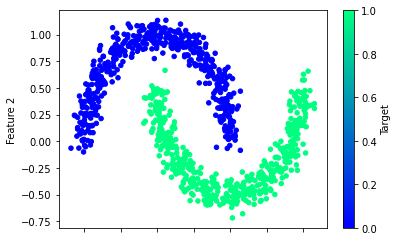

In [ ]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)


# Transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Create a DF ro plot nonlinear dummy data 
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"]= y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c ="Target",colormap="winter")

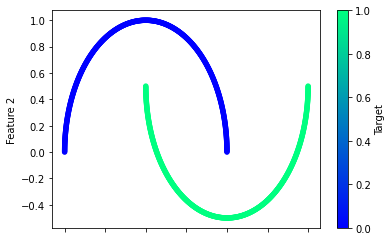

In [ ]:
# X_moons, y_moons = make_moons(n_samples=1000, random_state=78)

# # Transform y_moons to a vertical vector
# y_moons = y_moons.reshape(-1,1)

# # Create a DF ro plot nonlinear dummy data 
# df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
# df_moons["Target"]= y_moons

# # Plot the nonlinear dummy data
# df_moons.plot.scatter(x="Feature 1",y="Feature 2", c ="Target",colormap="winter")

In [ ]:
# Create trainig and tetsing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [ ]:
# train model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8973
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8973
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.8973
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8960
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8947
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.8933
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8933
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8920
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8920
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8920
Epoch 11/

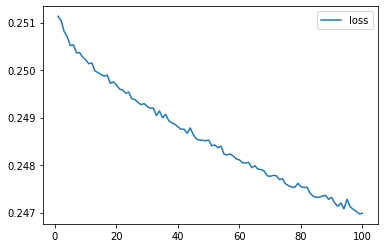

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

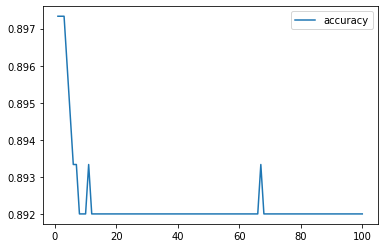

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Create New Model

In [ ]:
# Generate new sequential model
new_model = tf.keras.models.Sequential()

In [ ]:
# Add input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
# Compile the Sequential model togetehr and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model to training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7694 - accuracy: 0.3853
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.5387
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6453
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7213
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7587
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8107
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.8560
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.8587
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8680
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8707
Epoch 11/

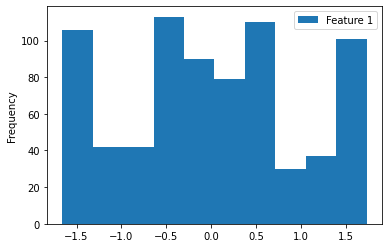

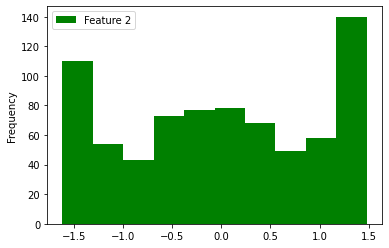

In [ ]:
# # # Create DF with dummy data
# df2 = pd.DataFrame(X_moon_train_scaled, columns=["Feature 1", "Feature 2"])
# df2["Target"] =y_moon_train

# #Plotting dummy data
# feat1_plot = df2.plot.hist(x="Target", y="Feature 1")
# feat1_plot

# feat2_plot = df2.plot.hist(x="Target", y="Feature 2", color="green")
# feat2_plot

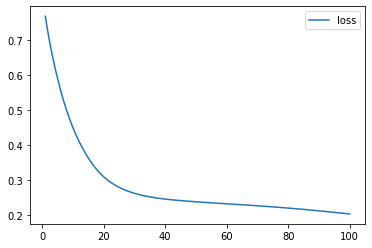

In [ ]:
# plot
# Create a DataFrame containing training history
history2_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history["loss"])+1))

# Plot the loss
history2_df.plot(y="loss")

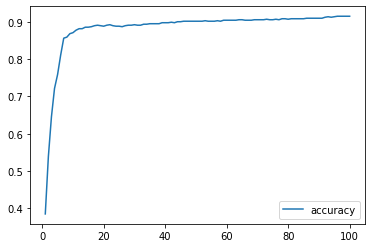

In [ ]:
# cacuracy 
# Plot the loss
history2_df.plot(y="accuracy")